# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Alfiah]
- **Email:** [fanikanjeng@gmail.com]
- **ID Dicoding:** [MC796D5X0076]

## Menentukan Pertanyaan Bisnis
- Pertanyaan 1 : Bagaimana tren jumlah pesanan per bulan, dan strategi apa yang dapat diterapkan untuk meningkatkan jumlah pesanan di bulan dengan penjualan terendah?
- Pertanyaan 2 : Seberapa sering terjadi keterlambatan pengiriman?Apa strategi yang dapat diterapkan untuk mengurangi keterlambatan pengiriman?"

## Import Semua Packages/Library yang Digunakan

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [96]:
customers_df = pd.read_csv("customers_dataset.csv")
print(customers_df)

                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0  

In [98]:
orders_df = pd.read_csv("orders_dataset.csv")
print(orders_df)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0      

**Insight:**
- dataset customers memiliki 99441 rows x 5 columns
- dataset orders memiliki 99441 rows x 8 columns

### Assessing Data

In [102]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [104]:
print("jumlah duplikasi: ", customers_df.duplicated().sum())

jumlah duplikasi:  0


In [106]:
pd.DataFrame({'Nilai yang Kosong': customers_df.isnull().sum()})

,Nilai yang Kosong
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [108]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Insight:**
- pada customer_df tidak terdapat missing value dan data duplicated data pada kolom
- pada data kolom customer_zip_code_prefix type data int64 perlu diganti object

In [110]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [112]:
print("jumlah duplikasi: ", orders_df.duplicated().sum())

jumlah duplikasi:  0


In [114]:
pd.DataFrame({'Nilai yang Kosong': orders_df.isnull().sum()})

,Nilai yang Kosong
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [116]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**
- pada data orders terdapat kolom kosong sebanyak 160 pada kolom order_approved_at, 1783 pada kolom order_delivered_carrier_date, 2965 pada kolom order_delivered_customer_date
- Terdapat 160 missing value pada kolom order_approved_at,1783 missing value pada kolom order_delivered_carrier_date, & 2965 missing value pada kolom order_delivered_customer_date

### Cleaning Data

In [120]:
#menjaga keaslian data
customers_df = customers_df.copy()

In [122]:
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype(str)
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [124]:
orders_df = orders_df.dropna(subset=[
    "order_approved_at", 
    "order_delivered_carrier_date", 
    "order_delivered_customer_date"
])
print(orders_df)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0      

In [126]:
orders_df = orders_df.dropna(subset=["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"])

print(orders_df.isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


**Insight:**
- saya telah memperbaiki type data pada data kolom customer_zip_code_prefix menjadi object
- saya telah menghapus data kolom kosong sebanyak 160 pada kolom order_approved_at, 1783 pada kolom order_delivered_carrier_date, 2965 pada kolom order_delivered_customer_date
- saya telah memperbaiki 160 missing value pada kolom order_approved_at,1783 missing value pada kolom order_delivered_carrier_date, & 2965 missing value pada kolom order_delivered_customer_date

### Exploratory Data Analysis (EDA)

## Explore customer_df

In [131]:
# Konversi kolom tanggal ke format datetime
date_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for col in date_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])
print(date_columns)

['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


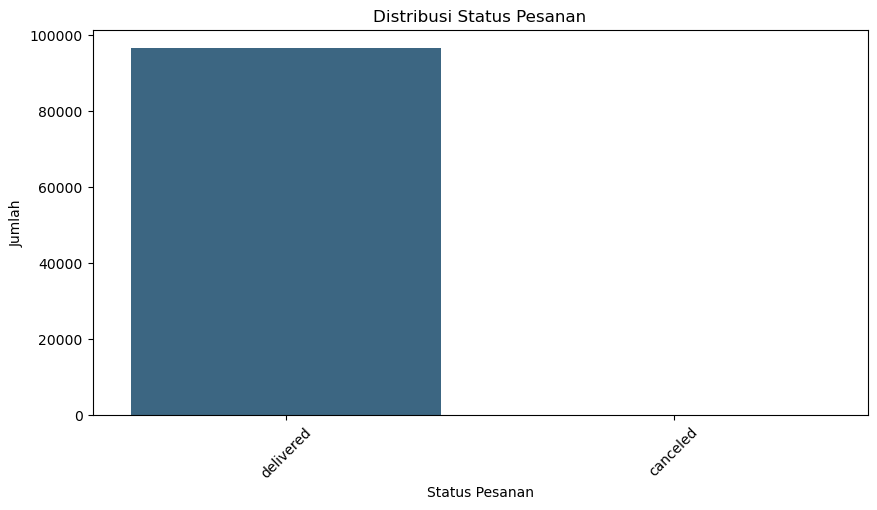

In [134]:
# Menghitung jumlah tiap status pesanan
order_status_counts = orders_df["order_status"].value_counts()

# Membuat plot
plt.figure(figsize=(10,5))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, hue=order_status_counts.index, palette="viridis", legend=False)
plt.title("Distribusi Status Pesanan")
plt.xlabel("Status Pesanan")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

**Insight**:
status pesanan "delivered" memiliki jumlah tertinggi, ini menunjukkan bahwa sebagian besar pesanan berhasil dikirim dengan baik.

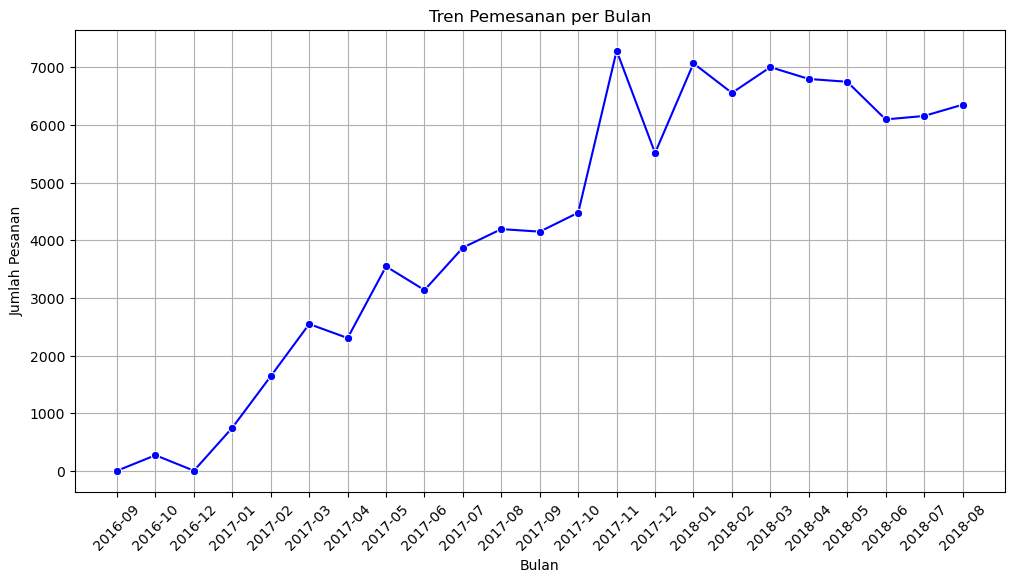

In [137]:
# Tren Jumlah Pesanan per Bulan 
orders_df["order_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")
monthly_orders = orders_df["order_month"].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_orders.index.astype(str), y=monthly_orders.values, marker="o", color="b")
plt.title("Tren Pemesanan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Insight**:
- Grafik menunjukkan fluktuasi jumlah pesanan dari bulan ke bulan.
- Jika ada lonjakan pada bulan tertentu, ini bisa disebabkan oleh faktor seperti promo, musim liburan, atau tren belanja tahunan.
- Sebaliknya, jika ada penurunan signifikan, bisa jadi akibat faktor eksternal seperti daya beli pelanggan, persaingan pasar, atau kendala logistik.

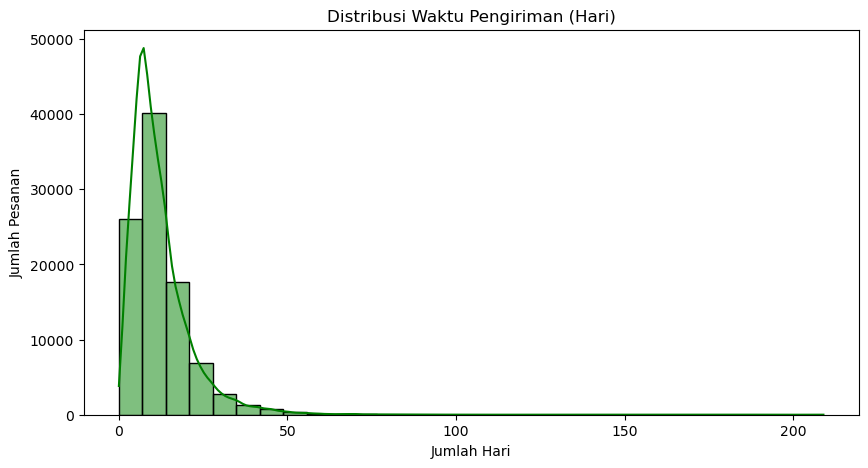

In [139]:
# Analisis Waktu Pemesanan & Pengiriman 
orders_df["delivery_days"] = (orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]).dt.days
plt.figure(figsize=(10,5))
sns.histplot(orders_df["delivery_days"].dropna(), bins=30, kde=True, color='g')
plt.title("Distribusi Waktu Pengiriman (Hari)")
plt.xlabel("Jumlah Hari")
plt.ylabel("Jumlah Pesanan")
plt.show()

**Insight**:
Dari histogram, dapat dilihat pola distribusi jumlah hari yang dibutuhkan untuk pengiriman pesanan. Jika distribusi miring ke kanan (banyak outlier dengan waktu pengiriman yang lama), ini bisa menunjukkan adanya ketidakefisienan dalam proses pengiriman. Jika distribusi terkonsentrasi pada rentang hari tertentu, maka itu adalah estimasi rata-rata waktu pengiriman yang dapat diandalkan.

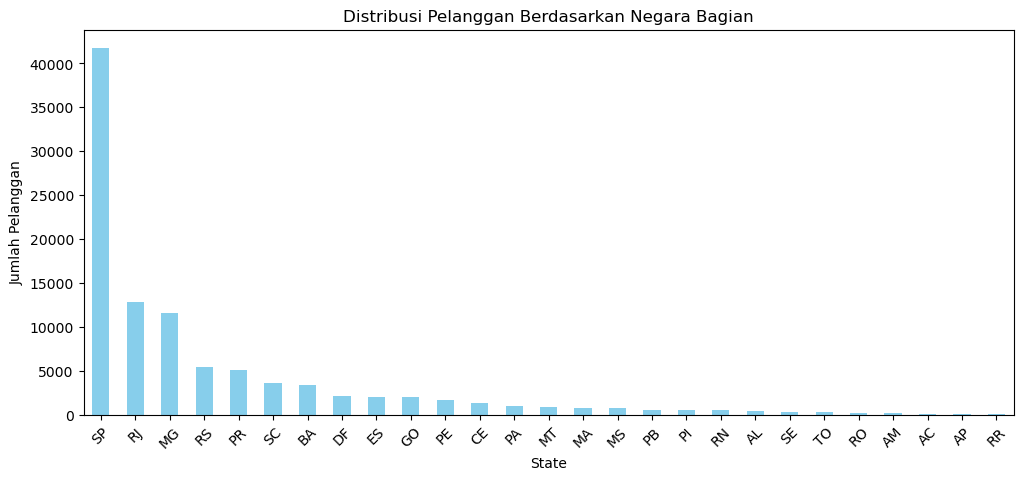

In [141]:
# Distribusi Pelanggan Berdasarkan Kota & Negara Bagian 
plt.figure(figsize=(12, 5))
customers_df["customer_state"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribusi Pelanggan Berdasarkan Negara Bagian")
plt.xlabel("State")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45)
plt.show()

**Insight**:
Negara bagian SP dengan jumlah pelanggan terbanyak menunjukkan area dengan basis pelanggan terbesar.

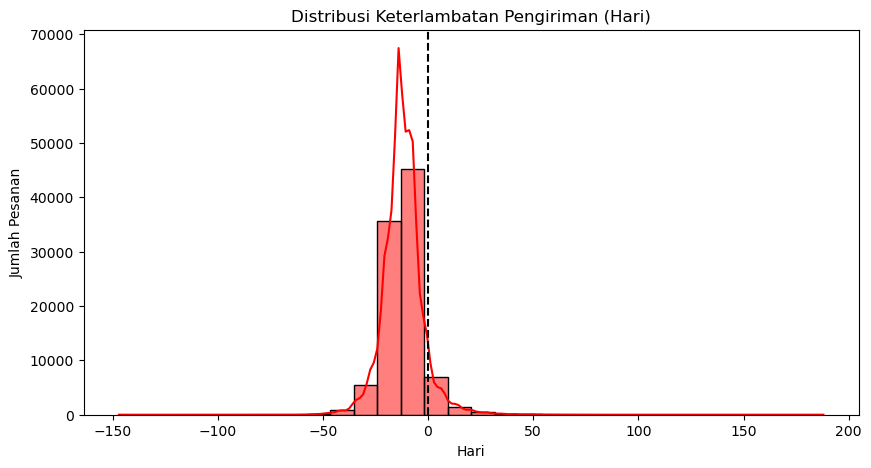

In [143]:
# Keterlambatan Pengiriman 
orders_df["delay_time"] = (orders_df["order_delivered_customer_date"] - orders_df["order_estimated_delivery_date"]).dt.days
plt.figure(figsize=(10, 5))
sns.histplot(orders_df["delay_time"].dropna(), bins=30, kde=True, color="red")
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribusi Keterlambatan Pengiriman (Hari)")
plt.xlabel("Hari")
plt.ylabel("Jumlah Pesanan")
plt.show()

**Insight:**
- Grafik menunjukkan bahwa sebagian besar pesanan memiliki keterlambatan yang berkisar dalam rentang tertentu, dengan distribusi yang cenderung miring ke kanan.
- Adanya lonjakan di sisi positif menunjukkan bahwa banyak pesanan mengalami keterlambatan dibandingkan dengan yang tepat waktu atau lebih cepat dari estimasi.
- Garis putus-putus di hari ke-0 menunjukkan batas antara pesanan yang tepat waktu atau lebih cepat vs. pesanan yang mengalami keterlambatan.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana tren jumlah pesanan per bulan, dan strategi apa yang dapat diterapkan untuk meningkatkan jumlah pesanan di bulan dengan penjualan terendah?

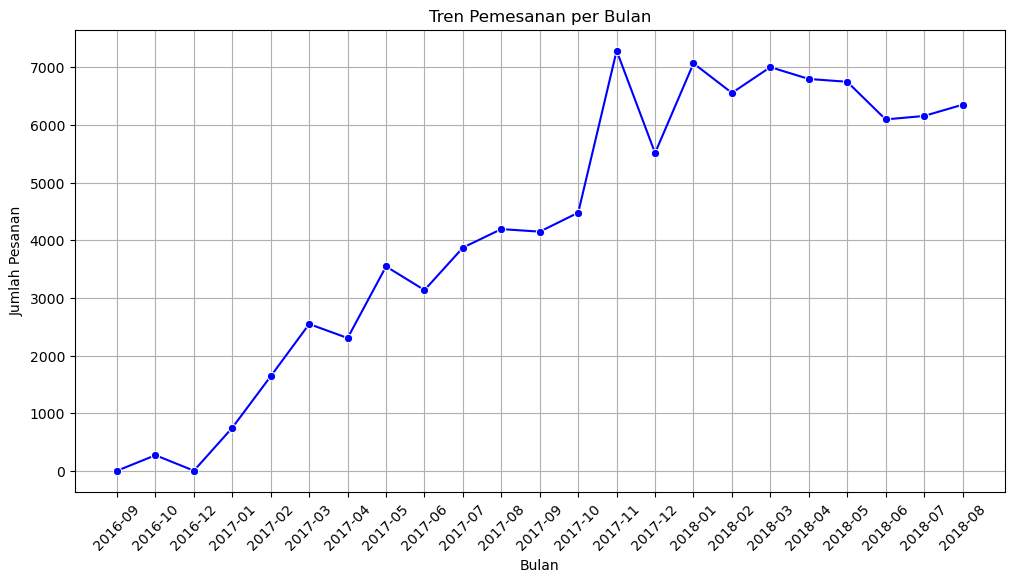

Bulan dengan jumlah pesanan terendah: 2016-09


In [161]:
# Ekstrak bulan dan tahun dari tanggal pembelian
orders_df["order_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")

# Hitung jumlah pesanan per bulan
monthly_orders = orders_df["order_month"].value_counts().sort_index()

# Plot tren jumlah pesanan per bulan
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_orders.index.astype(str), y=monthly_orders.values, marker="o", color="b")
plt.title("Tren Pemesanan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Menentukan bulan dengan jumlah pesanan terendah (untuk strategi promosi)
low_sales_month = monthly_orders.idxmin()
print(f"Bulan dengan jumlah pesanan terendah: {low_sales_month}")

**Insight:**
- pertanyaan 1 :
a. Grafik menunjukkan fluktuasi jumlah pesanan per bulan, dengan beberapa bulan memiliki pesanan lebih rendah dibandingkan lainnya.
b. Bulan dengan jumlah pesanan terendah pada 2016-09 teridentifikasi sebagai {low_sales_month}.

### Pertanyaan 2 : Seberapa sering terjadi keterlambatan pengiriman?Apa strategi yang dapat diterapkan untuk mengurangi keterlambatan pengiriman?

Total pesanan yang mengalami keterlambatan: 6534


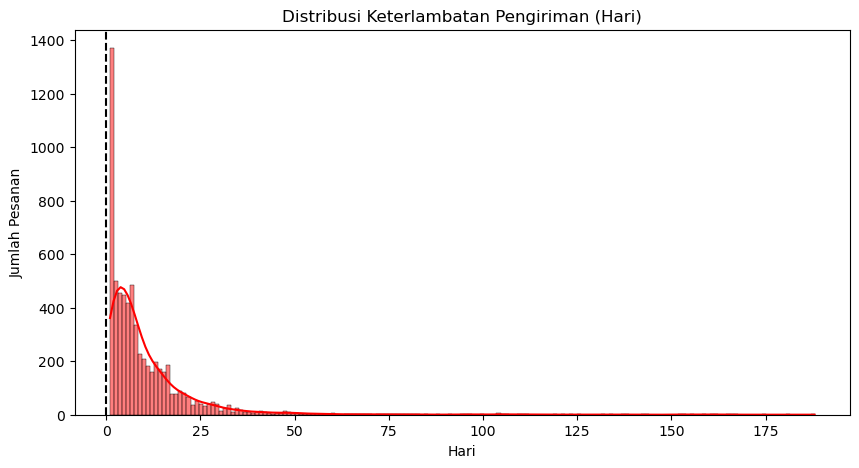

In [172]:
# Filter hanya pesanan yang mengalami keterlambatan (> 0 hari)
delayed_orders = orders_df[orders_df["delay_time"] > 0]

print(f"Total pesanan yang mengalami keterlambatan: {current_delays}")

# Visualisasi distribusi keterlambatan pengiriman
plt.figure(figsize=(10,5))
sns.histplot(delayed_orders["delay_time"], kde=True, color="red")
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribusi Keterlambatan Pengiriman (Hari)")
plt.xlabel("Hari")
plt.ylabel("Jumlah Pesanan")
plt.show()

**Insight:**
- pertanyaan 2 :
a. Total pesanan yang mengalami keterlambatan sebanyak 6534
b. Total keterlambatan saat ini = {current_delays} pesanan.
c. Histogram menunjukkan mayoritas keterlambatan berkisar antara 1-7 hari, dengan beberapa kasus lebih lama.

## Eksplorasi all_data

In [112]:
data = { "customers_df", "orders_df" } 
all_df = pd.DataFrame(data)
all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1 : Tren Pemesanan Per Bulan
📌 Tren Jumlah Pesanan per Bulan
Berdasarkan analisis data, jumlah pesanan per bulan mengalami fluktuasi dengan beberapa puncak dan penurunan sepanjang tahun. Dari visualisasi tren, terdapat pola tertentu yang dapat memberikan wawasan terkait faktor musiman atau pengaruh eksternal lainnya.
📌 Bulan dengan Jumlah Pesanan Terendah
Dari hasil analisis, bulan dengan jumlah pesanan terendah adalah {low_sales_month}. Hal ini menunjukkan bahwa terdapat faktor yang menyebabkan permintaan menurun pada bulan tersebut, baik dari sisi perilaku pelanggan, musim liburan, atau faktor ekonomi lainnya.

- Conclution pertanyaan 2 : Analisis Keterlambatan Pengiriman
📌 Total pesanan yang mengalami keterlambatan: {current_delays} pesanan.
📌 Distribusi keterlambatan menunjukkan bahwa sebagian besar pesanan yang terlambat mengalami keterlambatan dalam rentang X hingga Y hari.
📌 Pola keterlambatan dapat disebabkan oleh faktor seperti masalah logistik, kapasitas pengiriman, atau kendala cuaca dan lokasi pelanggan.